# 1 BUSINESS UNDERSTANDING

## 1.1 Overview
Consumers will give their business to brands they trust, and emotions are at the heart of this trust. When people identify with a brand, it’s easy for them to support the company. Marketers work hard to build and strengthen emotional ties to help consumers feel they have a vested interest in the brand’s success.

There are 486 million users on twitter and a lot of brands have hopped onto the platform to reach these potential customers. With the ever increasing portfolio of products, there is also an increase in the sentiments held by people who have interacted with them. Sentiment analysis refers to identifying and classifying the opinions expressed in the text source. The results of the analysis will assist businesses in determining how consumers feel about their goods and services, providing information on where changes can be made and what can be promoted.


## 1.2 Problem Statement
Twitter has become a major platform for many organisations worldwide to interact with their clients and other businesses. Major brands such as Google and Apple have a large following on twitter hence this platform offers a direct point of contact to their large pool of users. The composition users range from those who like, hate or are neutral towards a particular product, marketing strategy or proposed changes.

This pool of diverse users helps a brand, such as Google and Apple, identify a consumer’s sentiment towards its products and services thus leading to insights on where to bring improvements and what to promote.

These major brands would like to get the attitudes of their customers to their products which are available in the market.


## 1.3 Business Objective
To accurately classify the polarity of tweets to predict customers’ satisfaction when using either Apple or Google products.

## 1.4 Specific Objectives
- To identify the relationship between tweet sentiment and brands.
- To identify how brands are associated with emotions.


## 1.5 Business Success Criteria
The project will be deemed successful if:
- the brand is matched to its tweet sentiments
- the consumer can identify which brand they should adopt depending on its sentiments


## 1.6 Assessing the Situation
The dataset for this project contains tweets expressing sentiments on two main brands: Apple and Google. The two brands offer various devices and services. For instance ipads, iphones and various applications from either brand. The data contains numerous missing values hence the approach of handling them will greatly influence the success of the model. To begin with, we shall use local jupyter notebooks and sync on a git repository.

## 1.7 Determining Project Goals
The goals of the project are to determine:
- Which features in each brand provide customer satisfaction
- Which brand has the highest positive review



## 1.8 Determining Project Success Criteria
Tentatively, the study will be judged a success if:
- The final model achieves an accuracy, precision and recall of 80% or more in classifying  tweets as either positive, neutral or negative. How much confidence?
- The project can be finished within less than a week  time for deployment so as to enable clients access to the online system.
- The final deployed model is able to guide the marketing team on how to improve their products and marketing strategy.
- The final model is able to guide the clients on which products to choose from.


## 1.9 Project Plan
Duration: The project has a duration of 2 days:

Day 1:  Business Understanding, Data Understanding and Data Preparation

Day 2: Modeling, Evaluation and Deployment

Resources: There is enough available data for our analysis.

Personnels: The project has 6 young energetic dedicated personnel ready for the task.

# 2 DATA UNDERSTANDING
Data understanding mains goal is to gain general insights about the data that will potentially be helpful for the further steps in the data analysis process

## 2.1 Importing libraries and loading data

In [2]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import string

# Libraries used in visualization
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline


# Libraries for nlp
import re
import nltk
import wordninja 
from nltk.stem import WordNetLemmatizer
from textblob import Word
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('punkt',quiet=True)
nltk.download('wordnet',quiet=True)
nltk.download('stopwords',quiet=True)
nltk.download('omw-1.4',quiet=True)


# Libraries used in modelling
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV, StratifiedShuffleSplit
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report,ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import joblib


In [3]:
# Loading the first dataset
data1 = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding = 'latin1')
data1

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [4]:
# loading the second dataset
data2 = pd.read_csv("data2.csv",names=["tweet_text","is_there_an_emotion_directed_at_a_brand_or_product"],skiprows=1)
data2.head()

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [5]:
data = pd.concat([data1, data2], ignore_index=True, sort=False)


In [6]:
# Checking the dataset's head
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [7]:
# Checking the dataset's tail
data.tail(10)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
36564,"i`m defying gravity. and nobody in alll of oz,...",NaN,neutral
36565,http://twitpic.com/663vr - Wanted to visit the...,NaN,negative
36566,in spoke to you yesterday and u didnt respond...,NaN,neutral
36567,So I get up early and I feel good about the da...,NaN,positive
36568,enjoy ur night,NaN,positive
36569,wish we could come see u on Denver husband l...,NaN,negative
36570,I`ve wondered about rake to. The client has ...,NaN,negative
36571,Yay good for both of you. Enjoy the break - y...,NaN,positive
36572,But it was worth it ****.,NaN,positive
36573,All this flirting going on - The ATG smiles...,NaN,neutral


In [8]:
# Checking the shape
data.shape

(36574, 3)

#### Column Description.
There are 36,574 rows and 3 columns in our dataset. Below is a brief description of the data each column represents.
1. ##### tweet_text
These are the tweets made by either the consumers of Apple or Google products and services

2. ##### is_there_an_emotion_directed_at_a_brand_or_product
An opinion based on a consumers interaction with a product or service provided by the brand ie. a positive emotion, negative, or a neutral emotion.

3. ##### emotion_in_tweet_is_directed_at 
The type of product manufactured by a particular company, either Google or Apple.

In [9]:
# Description
data.describe()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,36572,3291,36574
unique,36545,9,7
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,neutral
freq,5,946,11118


In [10]:
# Checking for duplicates
data.duplicated().sum()

22

In [11]:
# Checking for missing values
data.isna().sum()

tweet_text                                                2
emotion_in_tweet_is_directed_at                       33283
is_there_an_emotion_directed_at_a_brand_or_product        0
dtype: int64

In [12]:
# Value_counts for the data
print(f"""
{data.emotion_in_tweet_is_directed_at.value_counts()}
-----------------------------------------------------------------------
{data.is_there_an_emotion_directed_at_a_brand_or_product.value_counts()}
""")


iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: emotion_in_tweet_is_directed_at, dtype: int64
-----------------------------------------------------------------------
neutral                               11118
positive                               8582
negative                               7781
No emotion toward brand or product     5389
Positive emotion                       2978
Negative emotion                        570
I can't tell                            156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64



In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36574 entries, 0 to 36573
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          36572 non-null  object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  36574 non-null  object
dtypes: object(3)
memory usage: 857.3+ KB


The following observations were made on the data:
- The data had 3 columns and 36574 rows
- There data contained 22 dupliates
- There were some missing values in the rows
- The target column is is_there_an_emotion_directed_at_a_brand_or_product and has 3 groups
- All columns were of object type

# 3 DATA PREPARATION

General steps:
- Rename columns
- Remove missing value from tweet_text
- Handle the duplicated data
- Remove Capitalization
- Remove Punctuation
- Remove stop words
- Fill emotion_in_tweet_is_directed_at with their appropriate values

## 3.1 Uniformity, Completeness and consistency checks
- The columns are renamed
- Duplicated data is dropped
- Missing values are handled

In [14]:
# Rename the columns
data.rename(columns={"tweet_text":"tweet","emotion_in_tweet_is_directed_at":"brand",
                    "is_there_an_emotion_directed_at_a_brand_or_product":"sentiment"},inplace=True)
data.head()

,tweet,brand,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [15]:
# Drop missing row in tweet column 
data.dropna(subset=["tweet"],inplace=True)
data.isna().sum()

tweet            0
brand        33281
sentiment        0
dtype: int64

In [16]:
# Drop the duplicated data
data.drop_duplicates(inplace=True)
# Check if the duplicates have been dropped
data.duplicated().sum()

0

In [17]:
# Remove Capitalization in tweets
data["tweet"] = data["tweet"].str.lower()
# Preview data
data.head()

,tweet,brand,sentiment
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iPhone,Negative emotion
1,@jessedee know about @fludapp ? awesome ipad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin can not wait for #ipad 2 also. the...,iPad,Positive emotion
3,@sxsw i hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on fri #sxsw: marissa m...,Google,Positive emotion


## 3.2 Basic cleaning of the data
In this section, the following is removed:
- The usernames from the tweet
- The hyperlinks in the tweet
- Hashtags in the tweet
- Punctuation and numbers are removed from the tweet
- Stopwords are removed from the texts

In [18]:
# Defining functions to clean data
def remove_links(tweet):
    """Takes in a string and removes weblinks from it"""

    tweet = re.sub(r"https\S+"," ",tweet) 
    tweet = re.sub(r"bit.ly/\S+", " ",tweet)
    return tweet

def remove_user(tweet):
    """Takes in a string and removes @user information from it"""
    tweet = re.sub('(rt\s@[a-z]+[a-z0-9-_]+)', '',tweet)
    tweet = re.sub('(@[a-z]+[a-z0-9-_]+)', '',tweet)
    # tweet = re.sub("(sxsw)"," ",tweet)
    # tweet = re.sub("(link)"," ",tweet)
    return tweet

def remove_hasgtags(tweet):
    """Takes in a string and removes @user information from it"""
    tweeet = re.sub('(#[a-z]+[a-z0-9-_]+)', '',tweet)
    return tweet

def basic_clean(tweet):
    """Returns cleaned data, remove punctuation and numbers"""

    tweet = remove_user(tweet)
    tweet = remove_links(tweet)
    tweet = remove_hasgtags(tweet)
    tweet = re.sub('['+ string.punctuation+ ']+', '',tweet) # Removes punctuation
    tweet = re.sub('([0-9]+)'," ",tweet) # Removes numbers
    return tweet
    

In [19]:
# Perform the basic clean on all the tweets in our dataframe
res = []
for tweets in data["tweet"]:
    res.append(basic_clean(tweets))
data["tweet"] = res
data.head()

,tweet,brand,sentiment
0,i have a g iphone after hrs tweeting at ri...,iPhone,Negative emotion
1,know about awesome ipadiphone app that youl...,iPad or iPhone App,Positive emotion
2,can not wait for ipad also they should sale...,iPad,Positive emotion
3,i hope this years festival isnt as crashy as ...,iPad or iPhone App,Negative emotion
4,great stuff on fri sxsw marissa mayer google ...,Google,Positive emotion


In [20]:
# Remove stop words 
stopwords = stopwords.words('english')
stopwords.extend(["sxsw","link"])
data['tweet'] = data.tweet.apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))

In [42]:
# Remove words that have less than 3 letters
data["tweet"] = data.tweet.apply(lambda x: " ".join(x for x in x.split() if not (len(x)<3)))


In [22]:
# Splitting concatenated words into separate words 
data['tweet'] = data.tweet.apply(lambda x: wordninja.split(str(TextBlob(x))))  
data['tweet'] = data.tweet.str.join(' ')
data[['tweet']].head() 

,tweet
0,iphone hrs tweeting rise austin dead need upgr...
1,know awesome ipad iphone app you ll likely app...
2,wait ipad also sale
3,hope years festival isnt crash y years iphone app
4,great stuff fri marissa mayer google tim o rei...


In [43]:
# Finding Most Frequent Words i.e. Below are top 10
freq = pd.Series(' '.join(data.tweet).split()).value_counts()[:10]
freq

ipad      3094
google    2801
day       2526
apple     2308
new       1886
get       1857
good      1778
today     1719
iphone    1682
like      1675
dtype: int64

In [24]:
# Preview the data
data.head()

,tweet,brand,sentiment
0,iphone hrs tweeting rise austin dead need upgr...,iPhone,Negative emotion
1,know awesome ipad iphone app you ll likely app...,iPad or iPhone App,Positive emotion
2,wait ipad also sale,iPad,Positive emotion
3,hope years festival isnt crash y years iphone app,iPad or iPhone App,Negative emotion
4,great stuff fri marissa mayer google tim o rei...,Google,Positive emotion


## 3.3 Rename contents of the dataframe
All products and services provided by Apple will be under the brand Apple, and Those provided by google will be placed under the brand name Google.

In [25]:
# Change the brand names to either Apple or Google
brands = {
    "iPhone":"Apple",
    "iPad": "Apple",
    "Android": "Google",
    "Android App": "Google",
    "iPad or iPhone App": "Apple",
    "Other Google product or service": "Google",
    "Other Apple product or service": "Apple"
}
data.replace({"brand":brands},inplace=True)

data.head()

,tweet,brand,sentiment
0,iphone hrs tweeting rise austin dead need upgr...,Apple,Negative emotion
1,know awesome ipad iphone app you ll likely app...,Apple,Positive emotion
2,wait ipad also sale,Apple,Positive emotion
3,hope years festival isnt crash y years iphone app,Apple,Negative emotion
4,great stuff fri marissa mayer google tim o rei...,Google,Positive emotion


In [26]:
# Fill the column in brand with their respective values
dict = {
    "iphone": "Apple",
    "android": "Google",
    "google": "Google",
    "ipad": "Apple",
    "ipad/iphone": "Apple",
    "apple": "Apple",
    "itunes": "Apple"
}

for key,value in dict.items():
    data["brand"][data.tweet.str.contains(key)] = value
data.brand.value_counts()

Apple     5592
Google    2987
Name: brand, dtype: int64

In [27]:
# Check null values
data.brand.isna().sum()

# Replace null values with Others
data.brand.fillna("Others",inplace=True)

In [28]:
# Check if the missing values have been handled
data.isna().sum()

tweet        0
brand        0
sentiment    0
dtype: int64

In [29]:
# Preview the data
data.head(10)

,tweet,brand,sentiment
0,iphone hrs tweeting rise austin dead need upgr...,Apple,Negative emotion
1,know awesome ipad iphone app you ll likely app...,Apple,Positive emotion
2,wait ipad also sale,Apple,Positive emotion
3,hope years festival isnt crash y years iphone app,Apple,Negative emotion
4,great stuff fri marissa mayer google tim o rei...,Google,Positive emotion
5,new ipad apps speech therapy communication sho...,Apple,No emotion toward brand or product
7,starting c tia around corner google io hop ski...,Google,Positive emotion
8,beautifully smart simple idea wrote holler gra...,Apple,Positive emotion
9,counting days plus strong canadian dollar mean...,Apple,Positive emotion
10,excited meet show sprint galaxy still running ...,Google,Positive emotion


In [30]:
# Replace the No emotion toward brand or product with Neurtal emotion
data.replace({"No emotion toward brand or product":"neutral"},inplace=True)
data.replace({"Positive emotion":"positive"},inplace=True)
data.replace({"Negative emotion":"negative"},inplace=True)

data.sentiment.value_counts()

neutral         16492
positive        11552
negative         8350
I can't tell      156
Name: sentiment, dtype: int64

Observations made:
- The brand column now has three unique values that is Apple, Google and Others.
- The sentiment column has four values, that is: Neutral, positive, negative and I can't tell
- The data is now free from capitalization, stop words, punctuations and links.

# 4 FEATURE ENGINEERING

- Tokenization
- lemmatization 
- Feature distribution
- Univariate and Bivariate analysis

In [31]:
# Tokenization
word_tokens = []

for words in data["tweet"]:
    word_tokens.append(word_tokenize(words))

In [32]:
# Lemmatization
lemma = WordNetLemmatizer()

data['lemmatization'] = data.tweet.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 


In [33]:
# Perform polarity on the tweets 
pol = []
for text in data["lemmatization"]:
    pol.append(np.sum(TextBlob(text).polarity))

In [34]:
# Add the polarity to the dataframe
data['polarity'] = pol
data.head()

,tweet,brand,sentiment,lemmatization,polarity
0,iphone hrs tweeting rise austin dead need upgr...,Apple,negative,iphone hr tweeting rise austin dead need upgra...,-0.200000
1,know awesome ipad iphone app you ll likely app...,Apple,positive,know awesome ipad iphone app you ll likely app...,0.466667
2,wait ipad also sale,Apple,positive,wait ipad also sale,0.000000
3,hope years festival isnt crash y years iphone app,Apple,negative,hope year festival isnt crash y year iphone app,0.000000
4,great stuff fri marissa mayer google tim o rei...,Google,positive,great stuff fri marissa mayer google tim o rei...,0.800000


In [35]:
# Change values of I can't tell to positive, negative or no emotion 
data.loc[(data["sentiment"] == "I can't tell") & (data["polarity"]>0),"sentiment"] = "positive"
data.loc[(data["sentiment"] == "I can't tell") & (data["polarity"]<0),"sentiment"] = "negative"
data.loc[(data["sentiment"] == "I can't tell") & (data["polarity"]==0),"sentiment"] = "neutral"
data.sentiment.value_counts()

neutral     16558
positive    11614
negative     8378
Name: sentiment, dtype: int64

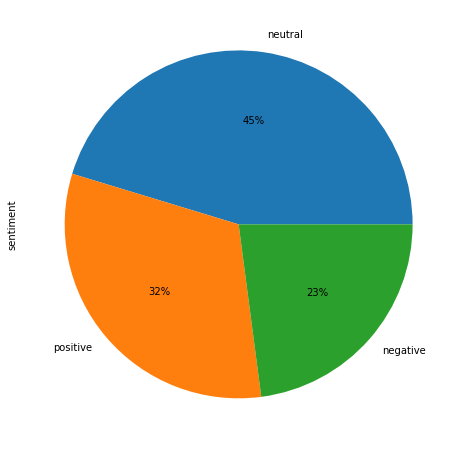

In [36]:
# Visualize the target variable
fig, ax = plt.subplots(figsize=(12,8))
data["sentiment"].value_counts().plot(kind="pie", autopct='%.0f%%');

Majority of the consumers have a neutral emotion towards the products at hand with a total of 45% of the population, those with a positive sentiment are 32% and those with a negative sentiment are 23%.

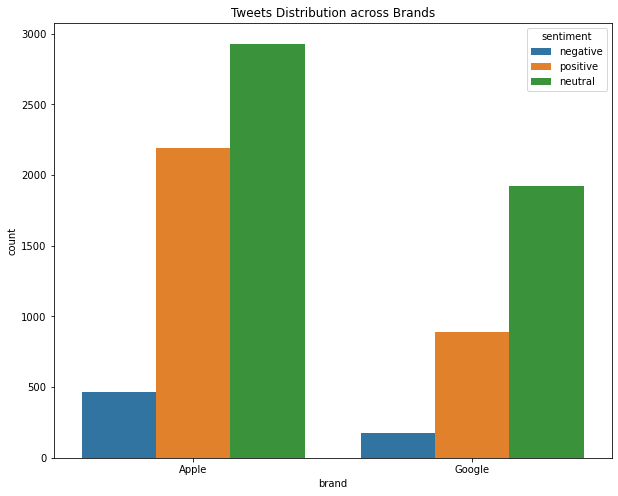

In [37]:
# Visualize the distibution across the brands
plt.figure(figsize=(10, 8))
x = data.loc[(data["brand"] == "Apple") | (data["brand"] == "Google")]

sns.countplot(x="brand", data=x, hue='sentiment')
plt.title('Tweets Distribution across Brands')
plt.show()

Both Apple and Google have majority of the tweets associated with them as neutral followed by positive then negative

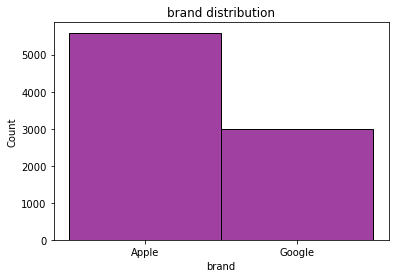

In [38]:
# Visualize distribution in the brands
ax = sns.histplot(x['brand'],color="purple")
ax.set_title('brand distribution');

Most of the population have Apple products, and in this population most of them have a neutral emotion towards the product, closely followed by consumers with a positive emotion. A few of them have a negative review.
For the Google products, a majority of the consumers have a neutral opinion on the products, and those with a positive review are almost half of those with the neurtal review. A few consumers have a negative review.

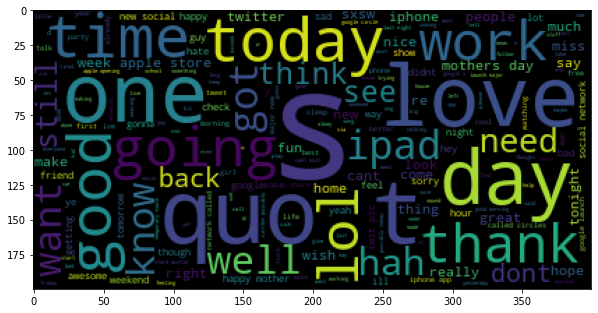

In [39]:
# Visualizing the word count in the tweets
# from PIL import Image
# twitter_mask = np.array(Image.open('images/twittermask.png'))

sentences = data['tweet'].tolist()
sentences_ss = " ".join(sentences)

plt.figure(figsize=(10,10))
# plt.imshow(WordCloud(background_color='white',mask=twitter_mask).generate(sentences_ss))
plt.imshow(WordCloud().generate(sentences_ss))

Among the most common words in our dataset are : 
- Love, one, today, day, going, good, time, got, lol, thank, really

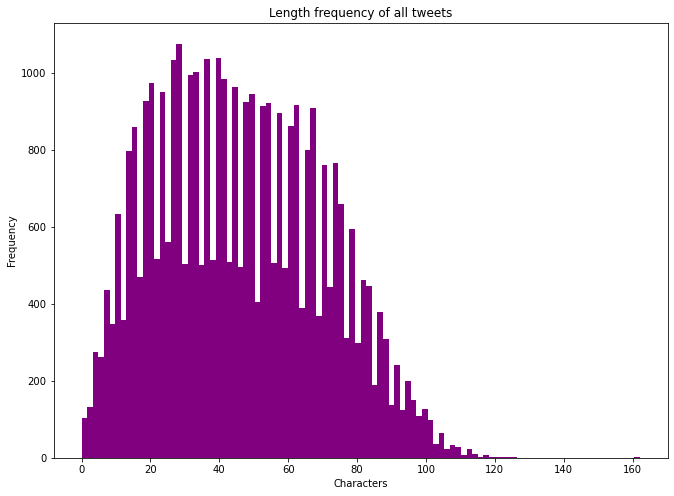

In [44]:
# Display the length of each tweet
data['tweet'].apply(len).plot(bins=100, kind = 'hist',figsize = (11,8),color="purple")
plt.title('Length frequency of all tweets')
plt.xlabel("Characters")
plt.show()

Most tweets are between 25 to 75 characters which is inline with twitter's wordcount of 280 characters per tweet.
The tweets do not have a count of more than 120 as most of the stopwords and punctuation as well as links have been removed in preparation of modelling the data

# 5 MODELING
The models investigated were:
- Multinomial Niave Bayes
- XGBoost
- GradientBoostingClassifier
- AdaBoostClasifier

The values in the target variables were interpreted as follows:
- 0: Negative emotion
- 1: Neutral emotion
- 2: Positive emotion

The data was then split into train and test with 30% of the data allocated to the test variables

A `TfidfVectorizer` was used to implement `tfidf` - *Term Frequency Inverse-Document Frequency* which reflects how important a word is in a corpus and is also used as a term-weighing scheme

Hyperparameters were specified in the models and they were then the tfidf vecorizer and y_train were fit to it


In [44]:
# Defining variables
X_lammetized = data['lemmatization']
target = data[["sentiment"]].apply(LabelEncoder().fit_transform)
y = target["sentiment"]

In [45]:
# Splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_lammetized, y, test_size=0.3, random_state=42)

In [46]:
# Creating a vectorizer
tfidf = TfidfVectorizer()

# Fit and transform vectorizer
X_train_vectorized = tfidf.fit_transform(X_train)
X_test_vectorized = tfidf.transform(X_test)

In [56]:
# Multinomial Naive Bayes
baseline = MultinomialNB()
baseline.fit(X_train_vectorized,y_train)

MultinomialNB()

In [57]:
# xgboost model
xgb_model = XGBClassifier(
    max_depth = 6,
    objective = 'multi:softmax',
    n_estimators = 1000,
    use_label_encoder=False,
    eval_metric='auc')
xgb_model.fit(X_train_vectorized,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

In [58]:
# gradient boosting
gbc_model = GradientBoostingClassifier(
    loss="log_loss",
    n_estimators=1000,
    random_state=42)
gbc_model.fit(X_train_vectorized,y_train)

GradientBoostingClassifier(n_estimators=1000, random_state=42)

In [59]:
# Adaboost
adaboost = AdaBoostClassifier(
    n_estimators= 100,
    random_state=42)
adaboost.fit(X_train_vectorized,y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

# 6 EVALUATION

The metrics used for evaluation are:
- Accuracy 
- F1 score


The models were scored based on the above metrics and displayed on a table for comparison

The model with the best score was found to be Adaboost

It had an the following metrics:
- `Accuracy`: 
- `F1 score`:


In [77]:
# Scoring  
def score(model,test_y=y_test,test_x=X_test_vectorized,train_y=y_train,train_x=X_train_vectorized):
    """This function outputs the f1 score and accuracy for the models"""
    y_pred_test = model.predict(test_x)
    y_pred_train = model.predict(train_x)
    f1_train = f1_score(train_y,model.predict(train_x),average="weighted")
    f1_test = f1_score(test_y,y_pred,average="weighted")

    test_accuracy = accuracy_score(test_y,y_pred)
    train_accuracy = accuracy_score(train_y,model.predict(train_x))

    ConfusionMatrixDisplay.from_predictions(test_y,y_pred_test)
    return {
        "Train F1 score": f1_train,
        "Test F1 score": f1_test,
        "Train accuracy": train_accuracy,  
        "Test accuracy": test_accuracy
    }


### 6.1 Confusion matrices

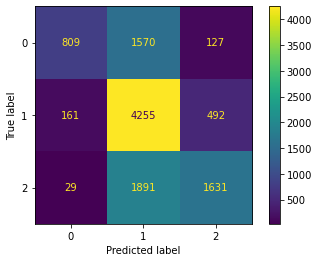

In [82]:
# Baseline model 
pred_y = baseline.predict(X_test_vectorized)
ConfusionMatrixDisplay.from_predictions(y_test,pred_y);

In the Multinomial Niave Bayes model, which was the base model, the following can be interpreted from its confusion matrix:

1. Negative emotion 
- 809 samples were correctly classified 
- 190 samples were incorrectly classified

2. Neutral emotion
- 4255 samples were correctly classified
- 3461 samples were incorrectly classified

3. Positive emotion
- 1631 samples were correctly classified
- 619 samples were incorrectly classified


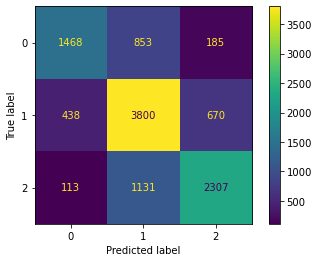

In [83]:
# XGBoost
pred_y = xgb_model.predict(X_test_vectorized)
ConfusionMatrixDisplay.from_predictions(y_test,pred_y);

In the XGBoost model, which was the base model, the following can be interpreted from its confusion matrix:

1. Negative emotion 
- 1468 samples were correctly classified 
- 551 samples were incorrectly classified

2. Neutral emotion
- 3800 samples were correctly classified
- 1948 samples were incorrectly classified

3. Positive emotion
- 2307 samples were correctly classified
- 855 samples were incorrectly classified


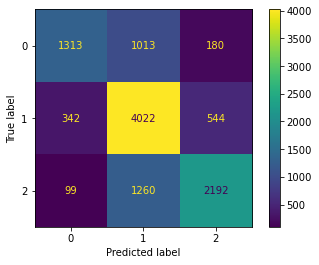

In [84]:
# Gradient Boosting
pred_y = gbc_model.predict(X_test_vectorized)
ConfusionMatrixDisplay.from_predictions(y_test,pred_y);

In the Gradient boosting model, which was the base model, the following can be interpreted from its confusion matrix:

1. Negative emotion 
- 1313 samples were correctly classified 
- 441 samples were incorrectly classified

2. Neutral emotion
- 4022 samples were correctly classified
- 2273 samples were incorrectly classified

3. Positive emotion
- 2192 samples were correctly classified
- 724 samples were incorrectly classified


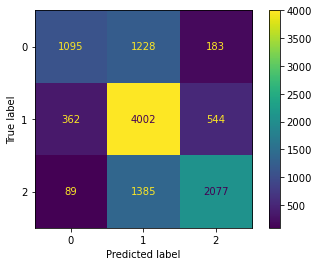

In [85]:
# Adaboost
pred_y = adaboost.predict(X_test_vectorized)
ConfusionMatrixDisplay.from_predictions(y_test,pred_y);

In the Adaboost model, which was the base model, the following can be interpreted from its confusion matrix:

1. Negative emotion 
- 1095 samples were correctly classified 
- 451 samples were incorrectly classified

2. Neutral emotion
- 4002 samples were correctly classified
- 2613 samples were incorrectly classified

3. Positive emotion
- 2077 samples were correctly classified
- 727 samples were incorrectly classified


### 6.2 Scores

In [92]:
# Placing all the models in a dataframe to view  their scores

df = pd.DataFrame()
df["Basemodel"] = score(baseline).values()
df["XGBoost"] = score(xgb_model).values()
df["GradientBoosting"] = score(gbc_model).values()
df["AdaBoost"] = score(adaboost).values()

df.index = ['Train F1 score', 'Test F1 score','Train accuracy','Test accuracy']
df

,Basemodel,XGBoost,GradientBoosting,AdaBoost
Train F1 score,0.722738,0.924575,0.780253,0.663089
Test F1 score,0.589345,0.689042,0.681812,0.646121
Train accuracy,0.732226,0.924722,0.782920,0.670823
Test accuracy,0.610579,0.690834,0.686457,0.654264


The model XGBoost and GradientBoosting models performed very well on the training data but were relatively poor on  the test data showing signs of overfiting.
The AdaBoost model thow having a relatively low accuracy than the GradientBoosting and XGBoost models it genaralised well on both training and test data hence was chosen as the final model for deployment.
On deployment using this AdaBoost model, the system did a good job in classifying semantics from a group of tweets and cn be realied upon by our clients to give an accurate classification of tweets. 
The link to the deployed site can be found here 


# 7 DEPLOYMENT
We went a head and deployed our model online to enable our clienct analyze and predict their tweet sentiments.
* The deployed model is able to analyze a list of tweets containing a peritculer topic or word to determine the sentiment in the tweet.The prediction model can be accessed [here](https://beast001-data-sonic-app-001v3i.streamlit.app/) 

* The deployed model is also capable of analysing each tweet polarity and subjectivity to know the relevance of each tweet  [here](https://beast001-twitter-sentiment-analyzer-streamlit-app-pubhvw.streamlit.app/) 


In [88]:
#create a pipline for the final model


# construct pipeline
tfidf = TfidfVectorizer()
adaboost = AdaBoostClassifier(n_estimators= 100,random_state=42)

pipe = Pipeline([
    ('tfidf', tfidf),
    ('adaboost', adaboost)
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('adaboost',
                 AdaBoostClassifier(n_estimators=100, random_state=42))])

In [89]:
#Export the model to be used for deployment online 
filename = 'finalized_model.sav'
joblib.dump(pipe, filename)

['finalized_model.sav']

In [91]:
#Test the model file by using it to predict a list of clean tweets
tweets_to_test = data['lemmatization'][0:5] # here you can call a list of the lemmatized tweets  eg X_train['lemmatization'][0:5]
filename = 'finalized_model.sav'
loaded_model = joblib.load(filename)
result = loaded_model.predict(tweets_to_test)
print(result)

[1 2 2 2 1]


# 8 Recommendation
- More balances data is needed to increase the accuracy of the model since the data used here was imbalanced and small for a Natural language processing Classifier to give a good classification.

- The model accuracy can also be improved by using a neural network which also will require more data to improve the model accuracy.
